# Maaş Tahminleme - Tecrübe Yılına Göre 

In [1]:
#job experience
#salary

In [33]:
#Kütüphanalerin Okunması
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
##DataSet in DataFrame olarak Okunması 
df = pd.read_csv("Salary_Data.csv")

In [8]:
#EDA - Exp Data Analysis

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
## Boş Veriler var mı kontrolu yapıyoruz.
df.isnull().sum() 

YearsExperience    0
Salary             0
dtype: int64

In [11]:
##Verilerin Görselleştirilmesi
##Tecrübe ile maaaş artışının 
figure = px.scatter(data_frame = data, 
                    x="Salary",
                    y="YearsExperience", 
                    size="YearsExperience", 
                    trendline="ols")
figure.show()

In [29]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

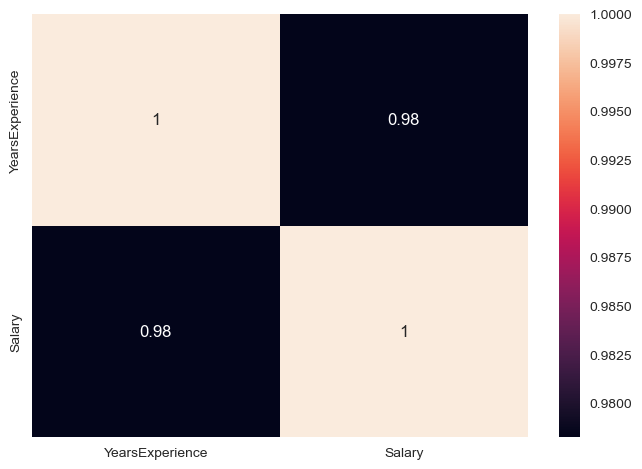

In [36]:
##plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

# Modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Model_Predict=np.asanyarray(data[["YearsExperience"]])
x = np.asanyarray(data[["YearsExperience"]])
y = np.asanyarray(data[["Salary"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [19]:
x.shape,y.shape,df.shape

((30, 1), (30, 1), (30, 2))

In [13]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [20]:
##Modelimizi Test Ediyoruz Başarılı Olduğunu Görüyoruz.
a = float(input("Years of Experience : "))
features = np.array([[a]])
print(features)
print("Predicted Salary = ", model.predict(features))

Years of Experience : 13
[[13.]]
Predicted Salary =  [[147831.18221118]]


# Classic Modelllerimiz ile bir bakalım

In [16]:
### Regression Modelleri için Bir Function Create Ediyoruz
def fnc_regression_all_model(x,y,predict_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    
    fnc_regression_all_model.predict1_df2_survived=GBR.predict(predict_test)
    
    
    return result.sort_values('R_Squared',ascending=False)

In [23]:
fnc_regression_all_model(x,y,Model_Predict)

,R_Squared,RMSE,MAE
LinearRegression,0.902446,7059.043622,6286.453831
Lasso,0.902446,7059.067542,6286.423714
Ridge,0.902163,7069.289407,6274.687372
ExtraTreeRegressor,0.902014,7074.662442,6453.000000
KNeighborsRegressor,0.901414,7096.287088,6091.100000
ElasticNet,0.896253,7279.675010,6152.595250
GradientBoostingRegressor,0.805220,9974.601877,8530.496270


# PyCaret Regression Tahminleme Yapalım

In [24]:
from pycaret.regression import*

In [26]:
##Modelimizi Compile Ediyoruz
exp_name=setup(df,target='Salary')

,Description,Value
0,Session id,7661
1,Target,Salary
2,Target type,Regression
3,Original data shape,"(30, 2)"
4,Transformed data shape,"(30, 2)"
5,Transformed train set shape,"(21, 2)"
6,Transformed test set shape,"(9, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [27]:
##Eniyi Model Karşılaştırması
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,5023.6170,36267944.3971,5531.8657,0.7607,0.0767,0.0690,0.4610
lr,Linear Regression,4804.5659,33456193.6000,5157.5706,0.7535,0.0785,0.0716,0.6810
lasso,Lasso Regression,4804.6310,33456208.6250,5157.5873,0.7535,0.0785,0.0716,0.2970
lar,Least Angle Regression,4804.5626,33456160.6000,5157.5679,0.7535,0.0785,0.0716,0.3310
llar,Lasso Least Angle Regression,4805.3805,33456829.1750,5157.8141,0.7535,0.0785,0.0716,0.3280
omp,Orthogonal Matching Pursuit,4804.5632,33456164.8000,5157.5682,0.7535,0.0785,0.0716,0.3300
br,Bayesian Ridge,4814.5076,33458104.6136,5160.5982,0.7534,0.0787,0.0719,0.3270
ridge,Ridge Regression,4834.5066,33483862.6500,5166.1939,0.7529,0.0791,0.0724,0.3360
huber,Huber Regressor,4843.6497,33991708.8072,5220.9481,0.7356,0.0791,0.0710,0.3330
en,Elastic Net,5076.6913,36383618.3500,5426.3881,0.7320,0.0861,0.0792,0.3320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]